In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from matplotlib import cm
import os
import pandas as pd

In [2]:

import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from matplotlib import cm
import os
import pandas as pd

def get_data_mini(setting, step, moving_step=10, test_zero = True):
    setting1, setting2 = setting
    temp = list()
    seeds = [0,1,2]
    for seed in seeds:
        for results in [""]:
            try: 
                if test_zero: foldername = "./results/miniimagenet/exact_contrastiveness/{}/mini_{}_seed{}{}/final_zero.csv".format(results, setting1, seed, setting2)
                else: foldername = "./results/miniimagenet/exact_contrastiveness/{}/mini_{}_seed{}{}/final.csv".format(results, setting1, seed, setting2)
                data = pd.read_csv(foldername).values[:,1]
                temp.append(data)
                continue
            except: 
                pass

    if temp == []:
        return [0, 0, 0, 0], [0, 0, 0, 0]
    return moving_average(np.mean(temp, axis=0), moving_step),  moving_average(np.std(temp, axis=0), moving_step)

def moving_average(x, w):
    try:
        a = np.concatenate((x[:5],np.convolve(x[5:], np.ones(w), 'valid') / w))
    except:
        return np.zeros_like(x)
    
    return a

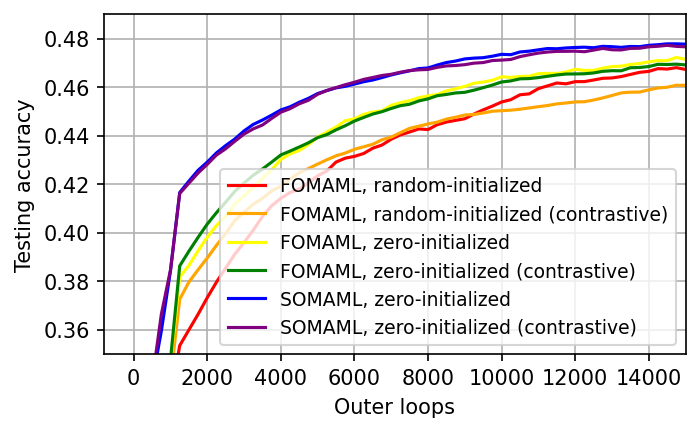

In [4]:
colors = ["red", "orange", "yellow", "green", "blue", "purple", "brown", "black"]
titles = ["Explicitly perform MAML \n using noisy contrastive loss", "zero"]
types = ["init1", "zero"]
orders = ["FO", "SO"]

labels = [
    "FOMAML init: w",
    "FOMAML init: w (contrastive)",
    "FOMAML init: 0",
    "FOMAML init: 0 (contrastive)",
    "SOMAML init: 0",
    "SOMAML init: 0 (contrastive)",
]

labels = [
    "FOMAML, random-initialized",
    "FOMAML, random-initialized (contrastive)",
    "FOMAML, zero-initialized",
    "FOMAML, zero-initialized (contrastive)",
    "SOMAML, zero-initialized",
    "SOMAML, zero-initialized (contrastive)",
]

settings = [
    ["maml_FO_init1", ""],
    ["contrastive_FO", "_IFR0"],
    
    ["maml_FO_zero", ""],
    ["contrastive_FO_zero", ""],

    ["maml_SO_zero", ""],
    ["contrastive_SO_zero", ""],
]

plt.figure(figsize=(5,3),dpi=150)

for i, setting in enumerate(settings):
    mean, _ = get_data_mini(setting, 3, test_zero = True, )
    plt.plot(np.arange(len(mean))*250, mean, label=labels[i], c=colors[i])

plt.legend(title_fontsize=10, fontsize=9)
plt.ylim([0.35,0.49])
plt.xlim([-800,15000]) 
plt.ylabel("Testing accuracy")
plt.xlabel("Outer loops")
plt.grid()
plt.savefig("./images/mini_exact_contrastiveness_20220301.pdf", bbox_inches='tight')